<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3498DB;
           font-size:200%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          text-align: center;
          font-size:140%;">
    💻 EDA on Data Science Job Salaries
</p>
</div>

<div style="width:100%;text-align: center;">
<img align=middle src="https://cdn.dribbble.com/users/725870/screenshots/5707131/attachments/1232426/data-science.jpg", width="600">
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:100%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: center;
          font-size:100%">
In this notebook, I have done Exploratory Data Analysis of 'Data Science Salaries' to understand the trends and get meaningful insights out of the data.<br>
    📌 Please upvote if you like this notebook! 
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3498DB;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          text-align: left;
          font-size:140%;">
    Index for Notebook
</p>
</div>

* [1. Imports and Set-up](#Imports-and-Set-up)
* [2. Exploratory Data Analysis](#EDA)
* [3. Univariate Analysis](#3)
    - [3.1 Numerical Attributes](#3-1)
         - [A. Distribution of Salary](#3-1-A)
         - [B. Remote Ratio](#3-1-B)
         - [C. Work Year](#3-1-C)
    - [3.2 Categorical Attributes](#3-2)
         - [A. Company Size](#3-2-A)
         - [B. Experience Level](#3-2-B)
         - [C. Employment Type](#3-2-C)
         - [D. Job Title](#3-2-D)
         - [E. Company Location](#3-2-E)
         - [F. Employee Residence](#3-2-F)
* [4. Multivariate Analysis](#4)
    - [4.1 Salary Analysis](#4-1)
        - [A. Relation between Salary in USD and Work Year](#4-1-A)
        - [B. Relation between Salary and Experience Level](#4-1-B)
        - [C. Distribution of Salary by Company Size](#4-1-C)
    - [4.2 Work Year Analysis](#4-2)
        - [A. Work Year and Remote Ratio](#4-2-A)
    - [4.3 Experience Level Analysis](#4-3)
        - [A. Experince Level and Employment Type](#4-3-A)
        - [B. Experince Level by Top Job Titles](#4-3-B)
    - [4.4 Correlation between Attributes in Data](#4-4)
        - [A. Spearman Correlation](#4-4-A)
        - [B. Confusion Matrix for Salary, Work year and Remote Ratio](#4-4-B)
        - [C. Confusion Matrix for all Attributes](#4-4-C)

<a id="Imports-and-Set-up"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3498DB;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:white;
          text-align: center;
          font-size:140%;">
    Imports and Set-up
</p>
</div>

<!-- <div style="color:white;
           display:fill;
           border-radius:5px;
           height:42px;
           background-color:#3498DB;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px;
           font-color:white">
     <h2>Imports and Set-up</h2>
</div> -->

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.preprocessing import OrdinalEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-science-job-salaries/ds_salaries.csv


<hr>

In [2]:
# Set Environment
PATH = '/kaggle/input/data-science-job-salaries/ds_salaries.csv'
# Colors for Plots
palette = ["#5EAFD9", "#449DD1", "#3977BB",
           "#2D51A5", "#FF4633", "#FF5746", 
           "#FF5733", "#FF360B"]
cmap = ListedColormap(palette, name='c_palette')
c_palette = cmap.colors
colors = [c_palette[_] for _ in range(0, len(c_palette), 2)]
# Size for plots
set_size = (8, 8)
# Font for pots
font_hd = {'fontsize':'20', 'fontweight':'bold'}
font_lbl = {'fontsize':'12', 'fontweight':'semibold'}

### **In this data, I have dropped some columns, namely ```Unnamed: 0```, ```salary``` and ```salary_currency``` and following is the resulting data:** <hr>

In [3]:
# Read dataset and remove a column working as index
df = pd.read_csv(PATH)
df.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


### **An outline of the data is as follows:**<hr>

In [4]:
print(f"There are {df.shape[0]} instances.")
print(f"There are {df.shape[1]} dataframe columns/attributes.")

num_attribs = ['work_year', 'salary_in_usd', 'remote_ratio']
cat_attribs = [df.columns[i] for i in range(len(df.columns)) if df.columns[i] not in num_attribs]

print(f"\nThere are {len(num_attribs)} numerical attributes: ")
for i in range(len(num_attribs)):
    print(f"{i+1}. {num_attribs[i]}")

print(f"\nThere are {len(cat_attribs)} categorical attributes: ")
for i in range(len(cat_attribs)):
    print(f"{i+1}. {cat_attribs[i]}")

There are 607 instances.
There are 9 dataframe columns/attributes.

There are 3 numerical attributes: 
1. work_year
2. salary_in_usd
3. remote_ratio

There are 6 categorical attributes: 
1. experience_level
2. employment_type
3. job_title
4. employee_residence
5. company_location
6. company_size


<a id="EDA"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3498DB;
           font-size:200%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:white;
          text-align: center;
          font-size:140%;">
    📊 Exploratory Data Analysis
</p>
</div>

<!-- <a id="EDA"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           height:50px;
           background-color:#3498DB;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px;
           font-color:white">
     <h1>📊 Exploratory Data Analysis</h1>
</div> -->

### **Let's find out about the missing values in the dataset.**<hr>

In [5]:
df.isna().sum(axis=0) / (len(df) * 100)

work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

<p style="font-size:18px;
          color:black">
    Great! There are no missing values in the dataset which makes our work easier.
</p>

<a id="3"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3498DB;
           font-size:150%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:white;
          text-align: center;
          font-size:140%;">
    Univariate Analysis
</p>
</div>

<!-- <div style="color:white;
           display:fill;
           border-radius:5px;
           height:50px;
           background-color:#3498DB;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px;
           font-color:white">
     <h1>1. Univariate Analysis</h1>
</div> -->

<a id="3-1"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#94D4FF;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:125%;">
    Numerical Attributes
</p>
</div>

<!-- <div style="color:black;
           padding:10px;
           display:fill;
           border-radius:5px;
           height:40px;
           background-color:#94D4FF;
           font-size:125%;
           text-align: left;
           font-family:Verdana;
           letter-spacing:0.5px;
           font-color:black">
     <h4>1.1 Numerical Attributes</h4>
</div> -->

<a id="3-1-A"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (A) Distribution of Salary
</p>
</div>

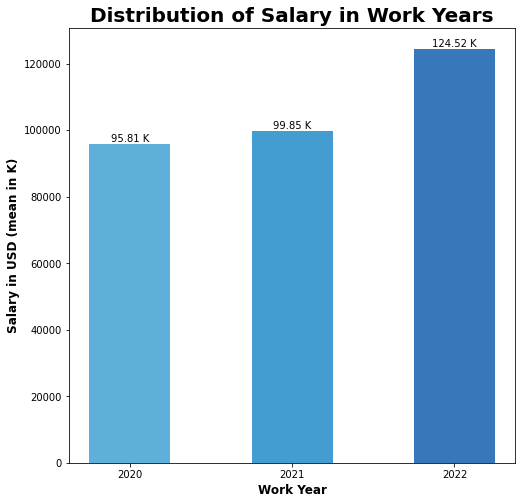

In [6]:
# Salary by work year
sal_dist = df[['work_year', 'salary_in_usd']]
sal_2020 = sal_dist.loc[sal_dist['work_year'] == 2020]
sal_2021 = sal_dist.loc[sal_dist['work_year'] == 2021]
sal_2022 = sal_dist.loc[sal_dist['work_year'] == 2022]
# Mean salary by work year
Y = [sal_2020['salary_in_usd'].mean(),
       sal_2021['salary_in_usd'].mean(),
       sal_2022['salary_in_usd'].mean()]
# Labels to plot
labels = np.round([Y[x]/1000 for x in range(len(Y))], 2)
labels = list(map(str, labels))
labels = [x + ' K' for x in labels]
X = ['2020', '2021', '2022']

plt.figure(figsize=set_size)
z = plt.bar(X, Y, width=0.5, color=[c_palette[0], c_palette[1], c_palette[2]])
plt.bar_label(z, labels=labels, padding=0.3)
plt.title('Distribution of Salary in Work Years', fontdict=font_hd)
plt.xlabel('Work Year', fontdict=font_lbl)
plt.ylabel('Salary in USD (mean in K)', fontdict=font_lbl)
plt.show()

> <p style="font-size:18px;
>           color:black">
>     This shows that highest mean salary was in year <b>2022</b>.
> </p>

<a id="3-1-B"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (B) Remote Ratio
</p>
</div>

<p style="font-size:18px;
          color:black">
    <ul>
    <p style="font-size:18px;
          color:black"><b>Remote ratio has following possible values:</b><p style="font-size:18px;
          color:black">
    <li><b>0:</b>  No remote work (less than 20%)</li>
    <li><b>50:</b> Partially Remote work</li>
    <li><b>100:</b> Fully remote (more than 80%)</li>
    </ul>
</p>

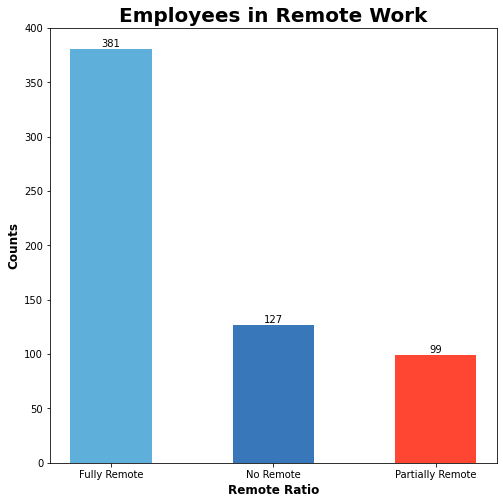

In [7]:
labels = ['Fully Remote', 'No Remote', 'Partially Remote']
values = df['remote_ratio'].value_counts().to_list()

# Plot bar chart
plt.figure(figsize=set_size)
z = plt.bar(labels, values, width=0.5, tick_label=labels, color=colors)
plt.bar_label(z, labels=values)
plt.title('Employees in Remote Work', fontdict=font_hd)
plt.xlabel('Remote Ratio', fontdict=font_lbl)
plt.ylabel('Counts', fontdict=font_lbl)
plt.show()

> <p style="font-size:18px;
>           color:black">
>  Majority of the employees work fully remotely (about 80% remote work).
> </p>

<a id="3-1-C"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (C) Work Year
</p>
</div>

In [8]:
# Create a function to customize autopct parameter of plt.pie()
def make_autopct(values):
    def my_autopct(pct):
        # The pct is percentage value that matplotlib supplies for every wedge
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.2f}%  ({val})'
    return my_autopct

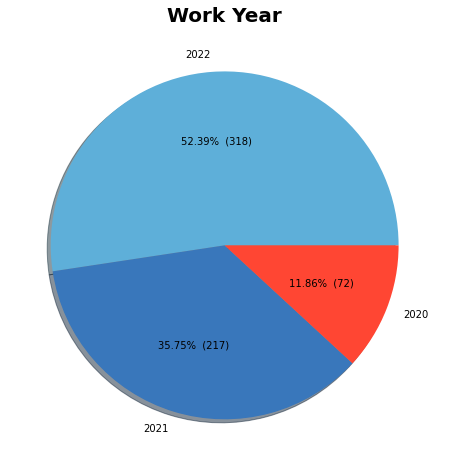

In [9]:
year = df['work_year'].value_counts().index.to_list()
counts = df['work_year'].value_counts().to_list()
# Plot Pie chart
plt.figure(figsize=set_size)
plt.pie(x=counts, labels=year, colors=[c_palette[0], c_palette[2], c_palette[4]], 
        autopct=make_autopct(values), shadow=True)
plt.title("Work Year", fontdict=font_hd)
plt.show()

> <p style="font-size:18px;
>           color:black">
    >  The work force is maximum in year <b>2022</b>. Thus, the field of data science is rising and in demand as well. 
> </p>

<a id="3-2"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#94D4FF;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:125%;">
    Categorical Attributes
</p>
</div>

<!-- <div style="color:black;
           padding:10px;
           display:fill;
           border-radius:5px;
           height:40px;
           background-color:#94D4FF;
           font-size:125%;
           text-align: left;
           font-family:Verdana;
           letter-spacing:0.5px;
           font-color:black">
     <h4>1.2 Categorical Attributes</h4>
</div> -->

<a id="3-2-A"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (A) Company Size
</p>
</div>

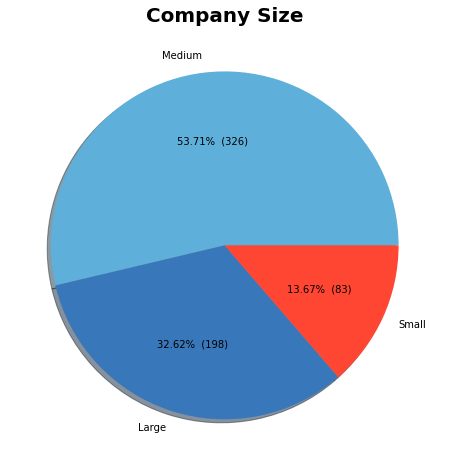

In [10]:
# Get labels for comapny size
labels = df['company_size'].value_counts().index.to_list()
labels = ['Medium', 'Large', 'Small']
# Get values for comapny size
values = df['company_size'].value_counts().to_list()
# Plot Pie Chart
plt.figure(figsize=set_size)
plt.pie(x=values, labels=labels, colors=[c_palette[0], c_palette[2], c_palette[4], c_palette[5]], 
        autopct=make_autopct(values), shadow=True)
plt.title("Company Size", fontdict=font_hd)
plt.show()

> <p style="font-size:18px;
>           color:black">
    >  <b>Medium</b> size companies consists more than <b>50%</b> of total data scientists.
> </p>

<a id="3-2-B"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (B) Experience Level
</p>
</div>

<p style="font-size:18px;
          color:black">
 <b>There are 4 categories in this attribute, namely:</b>
<ul>
<li><b>EN</b> - Entry-level / Junior</li> 
<li><b>MI</b> - Mid-level / Intermediate</li> 
<li><b>SE</b> - Senior-level / Expert</li>
<li><b>EX</b>  -Executive-level / Director</li>
</ul>
</p>

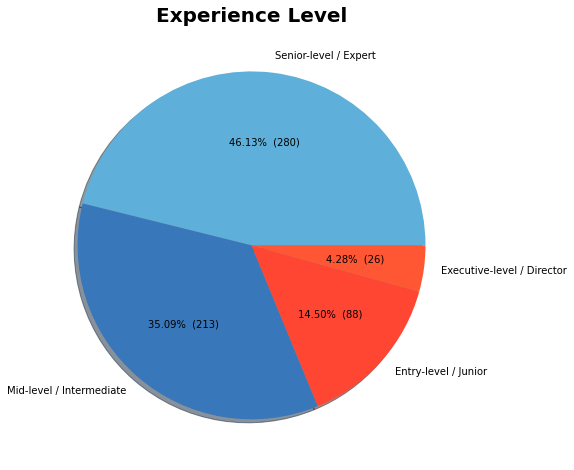

In [11]:
# Replace short forms with understandable labels
df['experience_level'].replace('EN', 'Entry-level / Junior', inplace=True)
df['experience_level'].replace('MI', 'Mid-level / Intermediate', inplace=True)
df['experience_level'].replace('SE', 'Senior-level / Expert', inplace=True)
df['experience_level'].replace('EX', 'Executive-level / Director', inplace=True)

# Set values and labels
labels = df['experience_level'].value_counts().index.to_list()
values = df['experience_level'].value_counts().to_list()

# Plot Pie Chart
plt.figure(figsize=set_size)
plt.pie(x=values, labels=labels, colors=colors, 
        autopct=make_autopct(values), shadow=True)
plt.title("Experience Level", fontdict=font_hd)
plt.show()

> <p style="font-size:18px; color:black">
> <b>Senior-level/ Expert</b> accounts majority of experience level in our data whereas <b>Executive Level/ Directors</b> is the least.
> </p>

<a id="3-2-C"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (C) Employment Type
</p>
</div>

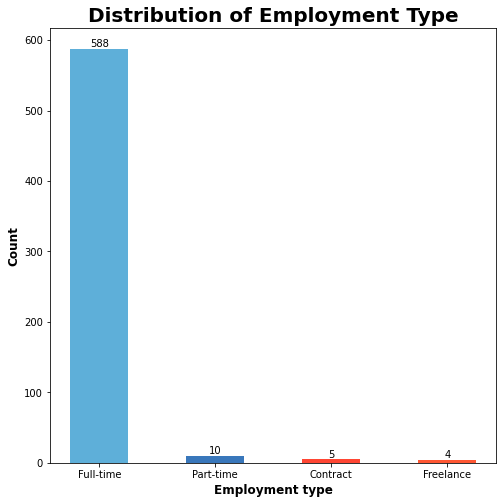

In [12]:
# Replcae abrevations with Full forms
df['employment_type'].replace('PT', 'Part-time', inplace=True)
df['employment_type'].replace('CT', 'Contract', inplace=True)
df['employment_type'].replace('FL', 'Freelance', inplace=True)
df['employment_type'].replace('FT', 'Full-time', inplace=True)
# Get label and values for employment type
labels = df['employment_type'].value_counts().index.to_list()
values = df['employment_type'].value_counts().to_list()
# Plot Bar Chart
plt.figure(figsize=set_size)
z = plt.bar(x=labels, height=values, width=0.5, color=colors)
plt.bar_label(z, labels=values, label_type='edge')
plt.title('Distribution of Employment Type', fontdict=font_hd)
plt.xlabel('Employment type', fontdict=font_lbl)
plt.ylabel('Count', fontdict=font_lbl)
plt.show()

> <p style="font-size:18px; color:black">
> The graph shows well enough that majority of employment type comprises of <b>Full-time</b>. There is very little </b><b>part-time</b>, <b>contract</b> and <b>freelance</b> workforce.
> </p>

<a id="3-2-D"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (D) Job Title
</p>
</div>

<p style="font-size:18px; color:black">
There are a lot of job titles varying throughout the industry. Let's find out about the job titles in our data:
</p>

In [13]:
print(f"Number of Job Titles in dataset is: {len(df['job_title'].value_counts().index.to_list())}.")

Number of Job Titles in dataset is: 50.


<p style="font-size:18px; color:black">
<b>There are a lot of Job Titles in number. So, we will:</b><br>
1. Plot the bar graph of top 5 job titles<br>
2. Create a Word Cloud to look at all titles.
</p>

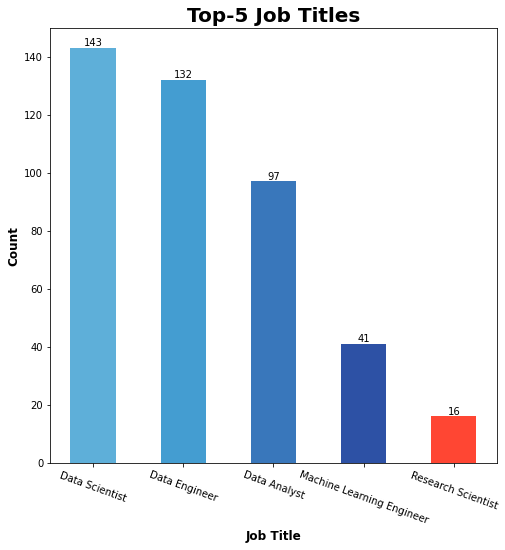

In [14]:
# Get label and values for top 5 job titles
top_roles = df['job_title'].value_counts()[:5]
x = top_roles.index
y = top_roles.values
# Plot bar graph
plt.figure(figsize=set_size)
z = plt.bar(x=x, height=y, width=0.5, color=c_palette)
plt.bar_label(container=z, labels=y)
plt.title('Top-5 Job Titles', fontdict=font_hd)
plt.xlabel('Job Title', fontdict=font_lbl)
plt.ylabel('Count', fontdict=font_lbl)
plt.xticks(rotation=-20)
plt.ylim(0, 150)
plt.show()

In [15]:
def frequency_df(wordlist):
    """
    Parameter: A list of type string.
    Returns: DataFrame with frequency distribution of strings.
    """
    freq_dist = nltk.FreqDist(wordlist)
    df_freq = pd.DataFrame.from_dict(freq_dist, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Title'
    df_freq = df_freq.sort_values(by=['Frequency'], ascending=False).reset_index()
    return df_freq

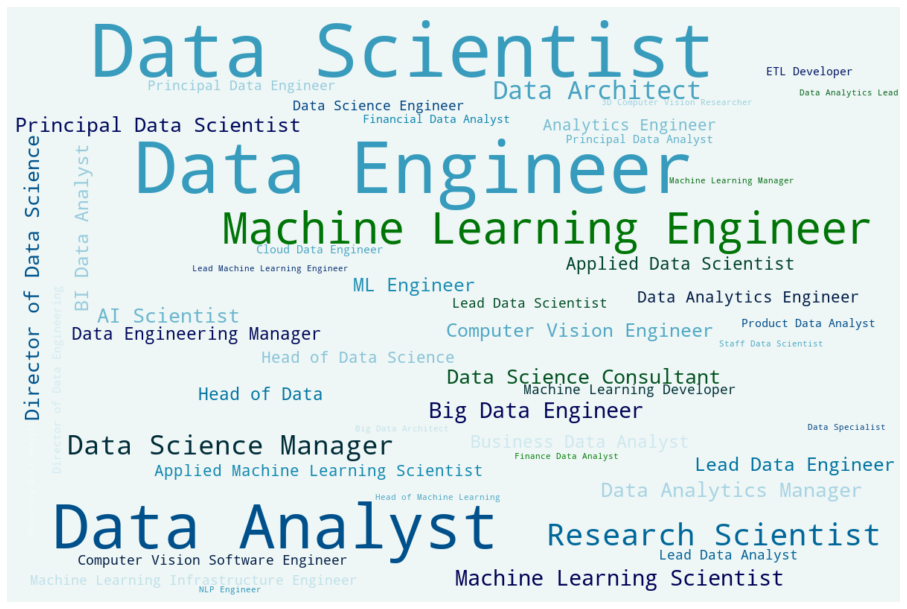

In [16]:
# Create data for WordCloud
wordlist = df['job_title'].values.tolist()
df_freq = frequency_df(wordlist)
data = dict(zip(df_freq['Title'].tolist(), df_freq['Frequency'].tolist()))
# Create WordCloud
plt.figure(figsize=(16, 12))
wc = WordCloud(width=1200,
              height=800,
              max_words=50,
              background_color='#EEF7F6',
              max_font_size=100,
              random_state=42,
              colormap='ocean').generate_from_frequencies(data)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<a id="3-2-E"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (E) Company Location
</p>
</div>

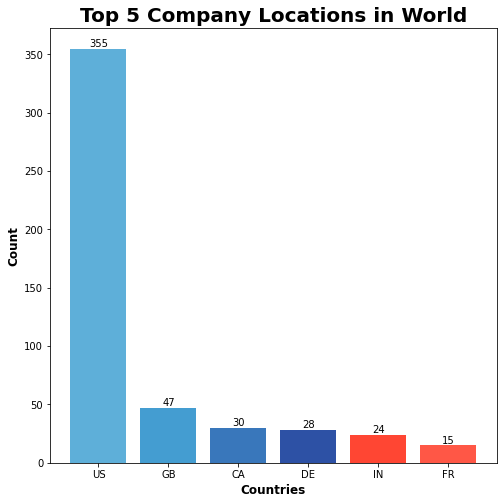

In [17]:
# Get data for top 5 countries
country = df['company_location'].value_counts().index.to_list()
val = df['company_location'].value_counts().to_list()
top_5_cont = country[:6]
top_5_val = val[:6]
# Plot bar chart
plt.figure(figsize=set_size)
z = plt.bar(x=top_5_cont, height=top_5_val, color=c_palette)
plt.bar_label(z, labels=top_5_val)
plt.title('Top 5 Company Locations in World', fontdict=font_hd)
plt.xlabel('Countries', fontdict=font_lbl)
plt.ylabel('Count', fontdict=font_lbl)
plt.show()

> <p style="font-size:18px; color:black">
> A whopping! number of companies are in <b>the United States.</b>
> </p>

<a id="3-2-F"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (F) Employee Residence
</p>
</div>

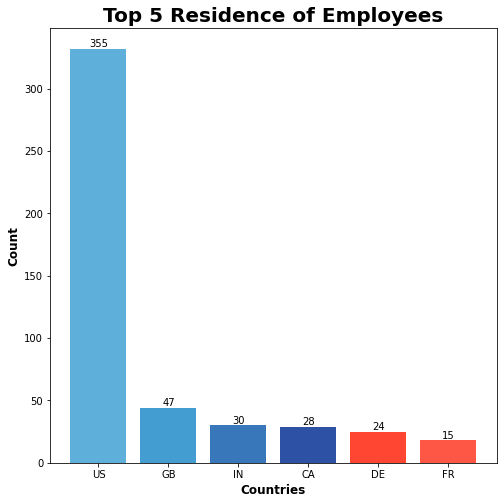

In [18]:
# Get data for top 5 residence of employees
countries = df['employee_residence'].value_counts().index.to_list()
count = df['employee_residence'].value_counts().to_list()
top_5_res = countries[:6]
top_5_count = count[:6]
# Plot bar chart
plt.figure(figsize=set_size)
z = plt.bar(x=top_5_res, height=top_5_count, color=c_palette)
plt.bar_label(z, labels=top_5_val)
plt.title('Top 5 Residence of Employees', fontdict=font_hd)
plt.xlabel('Countries', fontdict=font_lbl)
plt.ylabel('Count', fontdict=font_lbl)
plt.show()

> <p style="font-size:18px; color:black">
> Majority of the work force (data scientist) resides in <b>the United States.</b>
> </p>

<a id="4"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3498DB;
           font-size:150%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:white;
          text-align: center;
          font-size:140%;">
    Multivariate Analysis
</p>
</div>

<!-- <div style="color:white;
           display:fill;
           border-radius:5px;
           height:50px;
           background-color:#3498DB;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px;
           font-color:white">
     <h1>2. Multivariate Analysis</h1>
</div> -->

<a id="4-1"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#94D4FF;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:125%;">
    1. Salary Analysis
</p>
</div>

<!-- <div style="color:black;
           padding:10px;
           display:fill;
           border-radius:5px;
           height:40px;
           background-color:#94D4FF;
           font-size:125%;
           text-align: left;
           font-family:Verdana;
           letter-spacing:0.5px;
           font-color:black">
     <h4>1. Salary Analysis</h4>
</div> -->

<a id="4-1-A"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (A) Relation between Salary in USD and Work Year
</p>
</div>

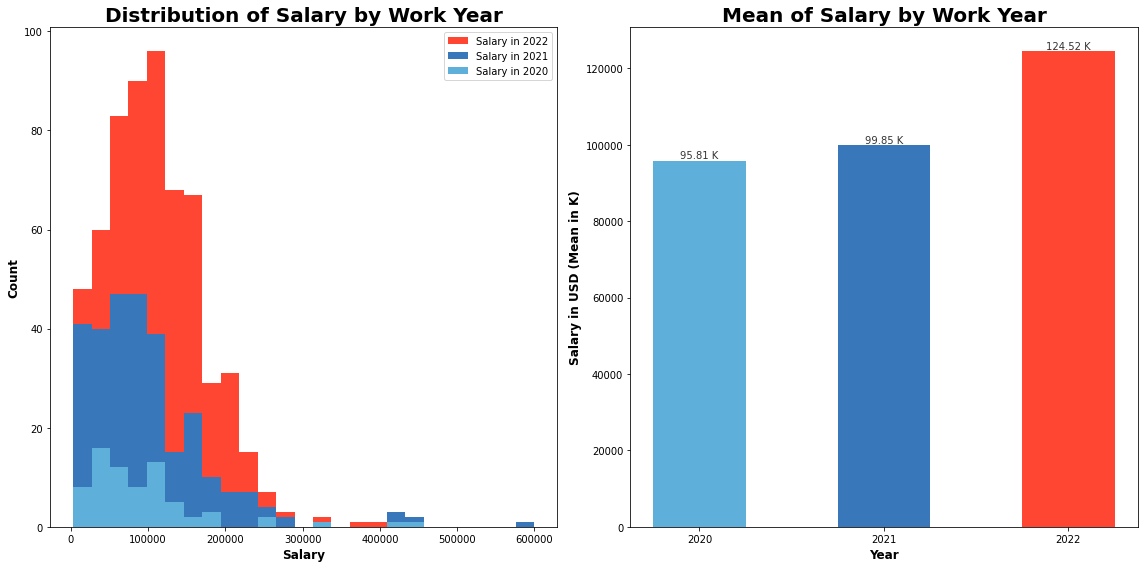

In [19]:
# Group data by year
year_2020 = df.loc[(df['work_year'] == 2020)]
year_2021 = df.loc[(df['work_year'] == 2021)]
year_2022 = df.loc[(df['work_year'] == 2022)]

plot_data = [year_2020['salary_in_usd'],
            year_2021['salary_in_usd'],
            year_2022['salary_in_usd']]
labels = ['Salary in 2020', 'Salary in 2021', 'Salary in 2022']

# Find mean of salary for each work year
wy_sal = pd.DataFrame(columns=['2020', '2021', '2022'])
wy_sal['2020'] = year_2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
wy_sal['2021'] = year_2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
wy_sal['2022'] = year_2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

# Plot distribution of salary
fig, axes = plt.subplots(figsize=(16, 8), nrows=1, ncols=2)
axes[0].hist(plot_data, bins=25, histtype='stepfilled',color=[c_palette[0], c_palette[2], c_palette[4]],
             label=labels, stacked=True)
axes[0].legend()
axes[0].set_title('Distribution of Salary by Work Year', fontdict=font_hd)
axes[0].set_xlabel('Salary', fontdict=font_lbl)
axes[0].set_ylabel('Count', fontdict=font_lbl)

# Gather data to plot mean
x = wy_sal.columns.values.astype(int)
h = wy_sal.values.tolist()[0]
labels = np.round([num/1000 for num in wy_sal.values.tolist()[0]], 2)
labels = list(map(str, labels))
new_labels = [labels[i] + ' K' for i in range(len(labels))]
colors = [c_palette[0], c_palette[2], c_palette[4]]

# Plot mean using bar plot
bar = plt.bar(x, h, width=0.5, color=colors,
       tick_label=[2020, 2021, 2022])
axes[1].bar_label(bar, new_labels, fmt='%b', alpha=0.8, padding=0.3)
# plt.yticks(ticks=plt.yticks()[1:], labels=[a/1000 for a in plt.yticks()[0]])
axes[1].set_title('Mean of Salary by Work Year', fontdict=font_hd)
axes[1].set_xlabel('Year', fontdict=font_lbl)
axes[1].set_ylabel('Salary in USD (Mean in K)', fontdict=font_lbl)
plt.tight_layout()
plt.show()

> <p style="font-size:18px; color:black"><br>
> 1. The mean salary is highest in year <b>2022</b>.<br>
> 2. The distribution of salary is majorly between <b>95.6K</b> USD to <b>200K</b> USD.
> </p>

<a id="4-1-B"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (B) Relation between Salary and Experience Level
</p>
</div>

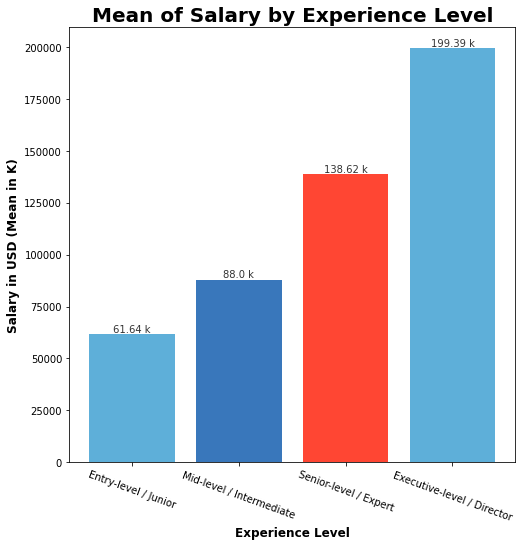

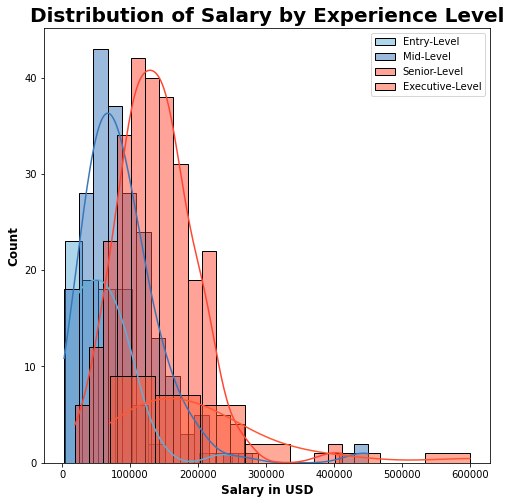

In [20]:
# Get data for salary and experience level
exp_sal = df[['experience_level', 'salary_in_usd']]

# Get salaries by experience level
entry_lev = exp_sal.loc[exp_sal['experience_level'] == 'Entry-level / Junior']
mid_lev = exp_sal.loc[exp_sal['experience_level'] == 'Mid-level / Intermediate']
senior_lev = exp_sal.loc[exp_sal['experience_level'] == 'Senior-level / Expert']
executive_lev = exp_sal.loc[exp_sal['experience_level'] == 'Executive-level / Director']

labels = ['Entry-level / Junior', 'Mid-level / Intermediate',
          'Senior-level / Expert', 'Executive-level / Director']
values = [entry_lev['salary_in_usd'].mean(), mid_lev['salary_in_usd'].mean(),
         senior_lev['salary_in_usd'].mean(), executive_lev['salary_in_usd'].mean()]

# Format 'values' for mean
values_fmt = np.round([x/1000 for x in values], 2)
values_fmt = list(map(str, values_fmt))
values_fmt = [values_fmt[i] + ' k' for i in range(len(values_fmt))]

# Plot a bar graph
plt.figure(figsize=set_size)
plt.xticks(rotation=-20)
bar = plt.bar(labels, values, color=colors)
plt.bar_label(bar, values_fmt, fmt='%b', alpha=0.8)
plt.title('Mean of Salary by Experience Level', fontdict=font_hd)
plt.xlabel('Experience Level', fontdict=font_lbl)
plt.ylabel('Salary in USD (Mean in K)', fontdict=font_lbl)
plt.show()

# KDE Plot
plt.figure(figsize=set_size)
sns.histplot(entry_lev['salary_in_usd'], color=c_palette[0], label="Entry-Level", kde=True)
sns.histplot(mid_lev['salary_in_usd'], color=c_palette[2], label="Mid-Level", kde=True)
sns.histplot(senior_lev['salary_in_usd'], color=c_palette[4], label="Senior-Level", kde=True)
sns.histplot(executive_lev['salary_in_usd'], color=c_palette[6], label="Executive-Level", kde=True)
plt.title('Distribution of Salary by Experience Level', fontdict=font_hd)
plt.xlabel('Salary in USD', fontdict=font_lbl)
plt.ylabel('Count', fontdict=font_lbl)
plt.legend()
plt.show()

> <p style="font-size:18px; color:black">
> Executive-Level employees earns the highest amount of salary followed by Senior-Level, Mid-Level and Entr-Level respectively.
> </p>

<a id="4-1-C"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (C) Distribution of Salary by Company Size
</p>
</div>

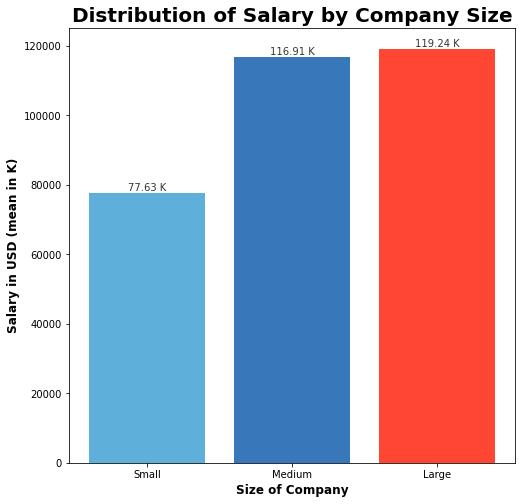

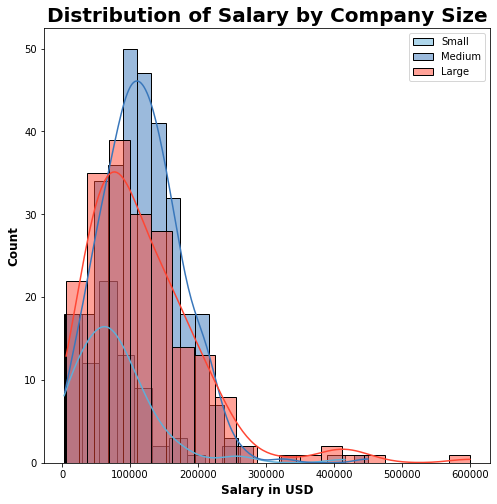

In [21]:
sal_co = df[['salary_in_usd', 'company_size']]

# Get salaries in clusters of size of companies
sal_S = sal_co.loc[sal_co['company_size'] == 'S']
sal_M = sal_co.loc[sal_co['company_size'] == 'M']
sal_L = sal_co.loc[sal_co['company_size'] == 'L']
labels = ['Small', 'Medium', 'Large']

# Get mean salary by company size
sal_mean = [sal_S['salary_in_usd'].mean(), sal_M['salary_in_usd'].mean(),
            sal_L['salary_in_usd'].mean()]
fmt_labels = np.round([x/1000 for x in sal_mean], 2)
fmt_labels = list(map(str, fmt_labels))
fmt_labels = [x + ' K' for x in fmt_labels]

# Plot bar chart
plt.figure(figsize=set_size)
z = plt.bar(labels, sal_mean, color=colors)
plt.bar_label(z, fmt_labels, alpha=0.8)
plt.title('Distribution of Salary by Company Size', fontdict=font_hd)
plt.xlabel('Size of Company', fontdict=font_lbl)
plt.ylabel('Salary in USD (mean in K)', fontdict=font_lbl)
plt.show()

# KDE plot
plt.figure(figsize=set_size)
sns.histplot(sal_S['salary_in_usd'], color=c_palette[0], label="Small", kde=True)
sns.histplot(sal_M['salary_in_usd'], color=c_palette[2], label="Medium", kde=True)
sns.histplot(sal_L['salary_in_usd'], color=c_palette[4], label="Large", kde=True)
plt.title('Distribution of Salary by Company Size', fontdict=font_hd)
plt.xlabel('Salary in USD', fontdict=font_lbl)
plt.ylabel('Count', fontdict=font_lbl)
plt.legend()
plt.show()

> <p style="font-size:18px; color:black">
> There is very little difference in mean salaries between medium size and large size companies.
> </p>

<a id="4-2"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#94D4FF;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:125%;">
    2. Work Year Analysis
</p>
</div>

<!-- <div style="color:black;
           padding:10px;
           display:fill;
           border-radius:5px;
           height:40px;
           background-color:#94D4FF;
           font-size:125%;
           text-align: left;
           font-family:Verdana;
           letter-spacing:0.5px;
           font-color:black">
     <h4>2. Work Year Analysis</h4>
</div> -->

<a id="4-2-A"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (A) Work Year and Remote Ratio
</p>
</div>

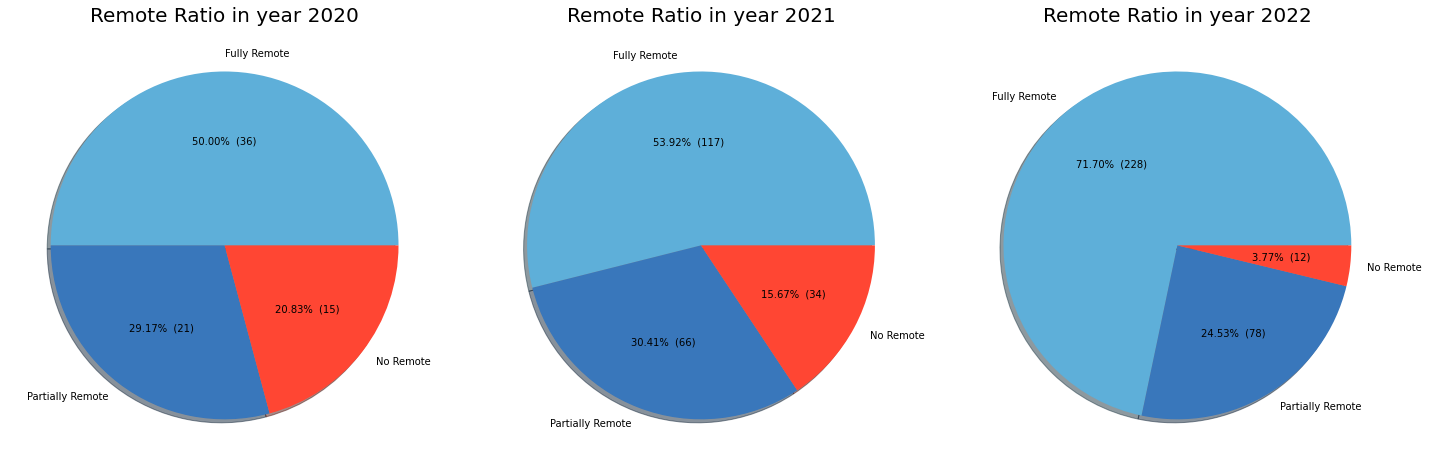

In [22]:
wk_rem = df[['work_year', 'remote_ratio']]
# Gather data by work year
wk_20 = wk_rem.loc[wk_rem['work_year'] == 2020]
wk_21 = wk_rem.loc[wk_rem['work_year'] == 2021]
wk_22 = wk_rem.loc[wk_rem['work_year'] == 2022]
labels = ['Fully Remote', 'Partially Remote', 'No Remote']

# Remote ratio by year
rem_year_20 = wk_20['remote_ratio'].value_counts().values
rem_year_21 = wk_21['remote_ratio'].value_counts().values
rem_year_22 = wk_22['remote_ratio'].value_counts().values

# Plot pie charts
fig, axes = plt.subplots(figsize=(20, 12), nrows=1, ncols=3)
plt.tight_layout()
axes[0].pie(x=rem_year_20, labels=labels, colors=colors, 
        autopct=make_autopct(rem_year_20), shadow=True)
axes[0].set_title("Remote Ratio in year 2020", fontdict={'fontsize':20})

axes[1].pie(x=rem_year_21, labels=labels, colors=colors, 
        autopct=make_autopct(rem_year_21), shadow=True)
axes[1].set_title("Remote Ratio in year 2021", fontdict={'fontsize':20})

axes[2].pie(x=rem_year_22, labels=labels, colors=colors, 
        autopct=make_autopct(rem_year_22), shadow=True)
axes[2].set_title("Remote Ratio in year 2022", fontdict={'fontsize':20})
plt.show()

> <p style="font-size:18px; color:black">
> Fully Remote work increased about <b>3%</b> between 2020 to 2021 but it increased <b>17.78%</b> in 2022. This may be due to <i>pandemic</i> in countries where majority of the work force resides.
> </p>

<a id="4-3"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#94D4FF;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:125%;">
    3. Experience Level Analysis
</p>
</div>

<!-- <div style="color:black;
           padding:10px;
           display:fill;
           border-radius:5px;
           height:40px;
           background-color:#94D4FF;
           font-size:125%;
           text-align: left;
           font-family:Verdana;
           letter-spacing:0.5px;
           font-color:black">
     <h4>3. Experience Level Analysis</h4>
</div> -->

<a id="4-3-A"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (A) Experince Level and Employment Type
</p>
</div>

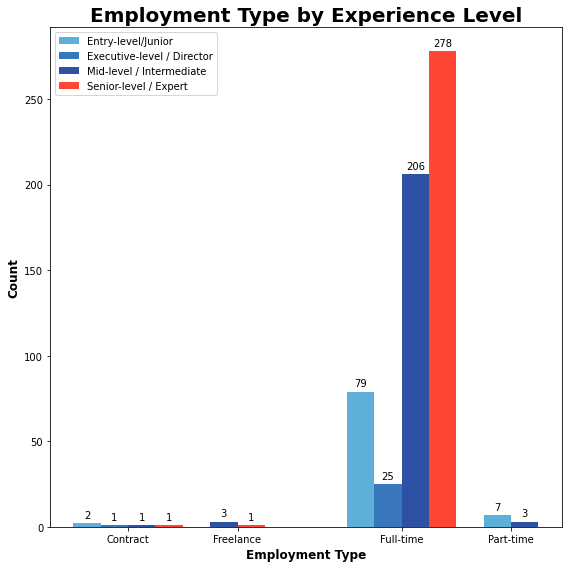

In [23]:
# Gather data of experience level by employment type (in terms of frequency)
exp_emp = df.groupby(['experience_level', 'employment_type']).size()
labels = sorted(df['employment_type'].value_counts().index.to_list())

# Plot a muli-bar graph
fig, ax = plt.subplots(figsize=set_size)
rects1 = ax.bar([1, 11, 16], exp_emp['Entry-level / Junior'].values,
                1, label='Entry-level/Junior', color=c_palette[0])
rects2 = ax.bar([2, 12], exp_emp['Executive-level / Director'].values,
                1, label='Executive-level / Director', color=c_palette[2])
rects3 = ax.bar([3, 6, 13, 17], exp_emp['Mid-level / Intermediate'].values,
                1, label='Mid-level / Intermediate', color=c_palette[3])
rects4 = ax.bar([4, 7, 14], exp_emp['Senior-level / Expert'].values,
                1, label='Senior-level / Expert', color=c_palette[4])
# Add all containers (rects[i]) to bar labels
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
# Set labeling of graph
ax.set_title("Employment Type by Experience Level", fontdict=font_hd)
ax.set_xlabel("Employment Type", fontdict=font_lbl)
ax.set_ylabel("Count", fontdict=font_lbl)
ax.set_xticks([2.5, 6.5, 12.5, 16.5], labels)
ax.legend()
fig.tight_layout()
plt.show()

> <p style="font-size:18px; color:black">
> Majority of the data scientists work Full-time and there are no more than 10 data scientists in other employment type.
> </p>

<a id="4-3-B"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (B) Experince Level by Top Job Titles
</p>
</div>

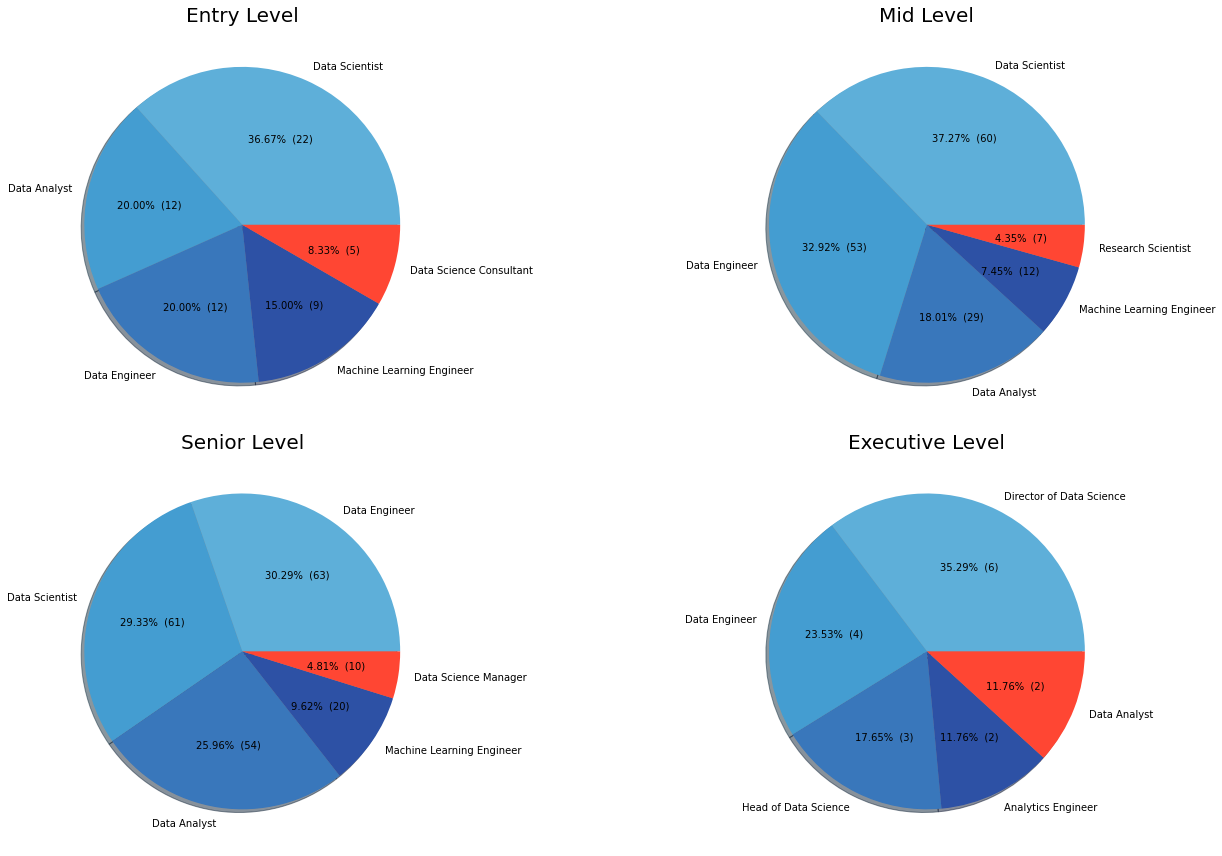

In [24]:
top_5 = sorted(df['job_title'].value_counts().index.to_list()[:5])

exp_ttl = df.groupby(['experience_level', 'job_title']).size()
entry = exp_ttl['Entry-level / Junior'].sort_values(ascending=False)[:5]
exe = exp_ttl['Executive-level / Director'].sort_values(ascending=False)[:5]
mid = exp_ttl['Mid-level / Intermediate'].sort_values(ascending=False)[:5]
sen = exp_ttl['Senior-level / Expert'].sort_values(ascending=False)[:5]

job_ttl = [entry.index, mid.index, sen.index, exe.index]
values = [entry.values, mid.values, sen.values, exe.values]
labels = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']
color5 = [c_palette[i] for i in range(5)]

# Plot pie charts
fig, ax = plt.subplots(figsize=(20, 12), nrows=2, ncols=2)
ax[0, 0].pie(x=values[0], labels=job_ttl[0], autopct=make_autopct(values[0]), shadow=True, colors=color5)
ax[0, 1].pie(x=values[1], labels=job_ttl[1], autopct=make_autopct(values[1]), shadow=True, colors=color5)
ax[1, 0].pie(x=values[2], labels=job_ttl[2], autopct=make_autopct(values[2]), shadow=True, colors=color5)
ax[1, 1].pie(x=values[3], labels=job_ttl[3], autopct=make_autopct(values[3]), shadow=True, colors=color5)

ax[0, 0].set_title(labels[0], fontdict={'fontsize':20})
ax[0, 1].set_title(labels[1], fontdict={'fontsize':20})
ax[1, 0].set_title(labels[2], fontdict={'fontsize':20})
ax[1, 1].set_title(labels[3], fontdict={'fontsize':20})
plt.tight_layout()
plt.show()

<a id="4-4"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#94D4FF;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:125%;">
    4. Correlation between Attributes in Data
</p>
</div>

<!-- <div style="color:black;
           padding:10px;
           display:fill;
           border-radius:5px;
           height:40px;
           background-color:#94D4FF;
           font-size:125%;
           text-align: left;
           font-family:Verdana;
           letter-spacing:0.5px;
           font-color:black">
     <h4>4. Correlation between Attributes in Data</h4>
</div> -->

<p style="font-size:18px; color:black">
    The following is a DataFrame which have only numeric attributes with features same as in the original dataset.<br>
    This DataFrame is developed using Ordinal Encoding.
</p>

In [25]:
# Get numeric and categorical columns
num_attribs = ['work_year', 'salary_in_usd', 'remote_ratio']
cat_attribs = [df.columns[i] for i in range(len(df.columns)) if df.columns[i] not in num_attribs]
# Create a DataFrame with only numeric values
num_df = df[num_attribs]
# Create a DataFrame with only categorical values
cat_df = df[cat_attribs]
# Apply OrdinalEncoder from sklearn (assigns numeric values to categorical features)
ordinal_enc = OrdinalEncoder()
cat_df_enc = ordinal_enc.fit_transform(cat_df)
# Convert numpy array to pandas DataFrame
cat_enc_df = pd.DataFrame(data=cat_df_enc, columns=cat_attribs)
# Join encoded df and numeric df
enc_df = num_df.join(cat_enc_df)
enc_df.head()

,work_year,salary_in_usd,remote_ratio,experience_level,employment_type,job_title,employee_residence,company_location,company_size
0,2020,79833,0,2.0,2.0,22.0,14.0,12.0,0.0
1,2020,260000,0,3.0,2.0,41.0,32.0,29.0,2.0
2,2020,109024,50,3.0,2.0,7.0,20.0,18.0,1.0
3,2020,20000,0,2.0,2.0,47.0,23.0,20.0,2.0
4,2020,150000,50,3.0,2.0,38.0,55.0,48.0,0.0


<a id="4-4-A"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (A) Spearman Correlation
</p>
</div>

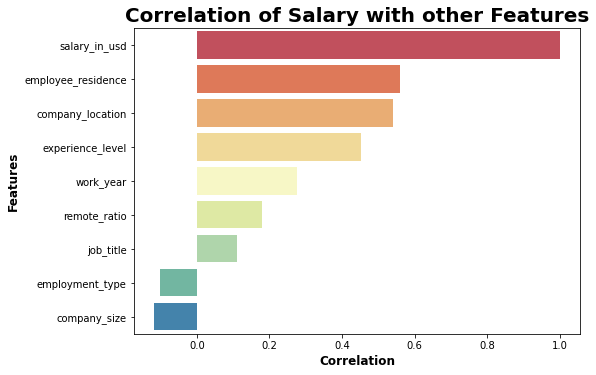

In [26]:
# Get correlation matrix
corr_matrix = enc_df.corr(method='spearman')
spr = corr_matrix['salary_in_usd'].sort_values(ascending=False)
# Plot confusion matrix
plt.figure(figsize=(8, (0.625*len(spr.index))))
sns.barplot(x=spr.values, y=spr.index, orient='h', palette="Spectral", )
plt.title("Correlation of Salary with other Features", fontdict=font_hd)
plt.xlabel("Correlation", fontdict=font_lbl)
plt.ylabel("Features", fontdict=font_lbl)
plt.show()

> <p style="font-size:18px; color:black">
> <b>The highest correlation of 'Salary in USD' is with:</b><br>
> 1. Employee Residence<br>
> 2. Company Location<br>
> 3. Experience Level<br><br>
> <i>On the other hand, 'Employment Type' and 'Company Size' have a negative correlation with 'Salary in USD'.</i>
> </p>

<a id="4-4-B"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (B) Confusion Matrix for Salary, Work year and Remote Ratio
</p>
</div>

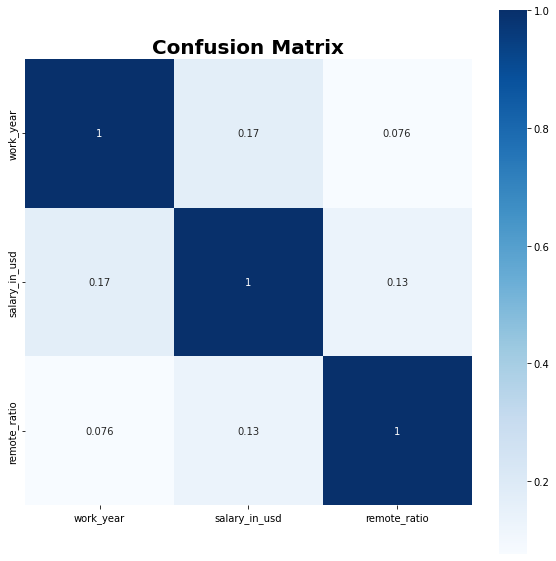

In [27]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, square=True, cbar=True, cmap="Blues")
plt.title("Confusion Matrix", fontdict=font_hd)
plt.show()

<a id="4-4-C"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B2F6F5;
           font-size:125%;
           text-align: center;
           font-family:Verdana;
           letter-spacing:0.5px">
    
<p style="padding: 10px;
          color:black;
          text-align: left;
          font-size:100%;">
    (C) Confusion Matrix for all Attributes
</p>
</div>

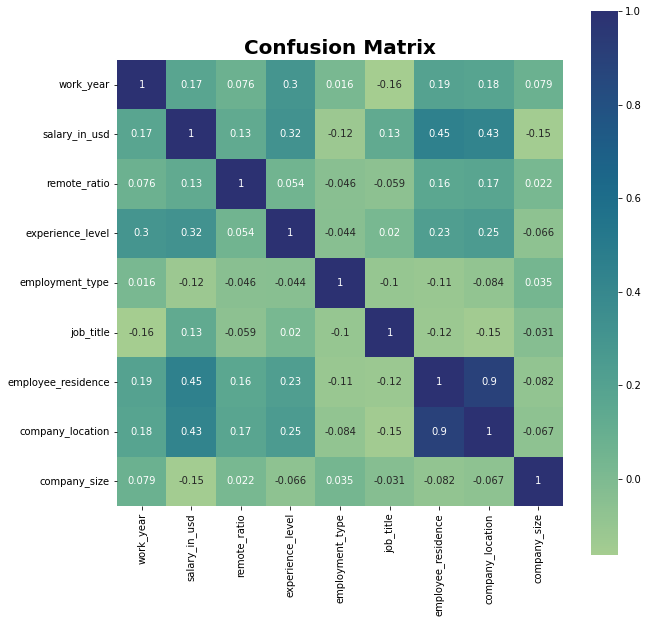

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(enc_df.corr(), annot=True, square=True, cbar=True, cmap="crest")
plt.title("Confusion Matrix", fontdict=font_hd)
plt.show()

<hr>
<p style="color:black;
          height:70px;
          display:fill;
          border-radius:5px;
          background-color:#B2F6F5;
          font-size:100%;
          text-align: center;
          font-family:Verdana;
          letter-spacing:0.5px;">
     ✨ Thank You! for your read till here.<br>If you liked my work, please upvote this notebook. 📗
</p>
<hr>